# **Customer Clustering/Segmentation**
### 1. Process the .csv from received 
### 2. Use Machine Learning(k-means algorithm) for customer segmentation
### 3. Pick the right customer segment 
    - Loan Amount vs Loan Balance
### 4.  Share/Run the selected segement for promotions
### 5.  Post Promotion Analysis - Customer REACH
### 6.  Other cases
    - Credit Score vs Loan Balance
    - Income vs Loan Balance
*Note : 100% mock data used in csv file and charts may not reflect as expected*

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>




# 1. Process the .csv from received

In [16]:
# Import packages
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# Import the customer mock data
df = pd.read_csv("demo.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   client_id            1000 non-null   int64  
 1   first_name           1000 non-null   object 
 2   last_name            1000 non-null   object 
 3   email                1000 non-null   object 
 4   gender               1000 non-null   object 
 5   country              1000 non-null   object 
 6   state                1000 non-null   object 
 7   loan_amount          1000 non-null   float64
 8   loan_balance         1000 non-null   float64
 9   loan_id              1000 non-null   int64  
 10  max_days_delinquent  1000 non-null   int64  
 11  age_of_loan          1000 non-null   int64  
 12  no_of_loans          1000 non-null   int64  
 13  credit_score         1000 non-null   int64  
 14  income               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memo

In [17]:
# See some of the data
df.head()

,client_id,first_name,last_name,email,gender,country,state,loan_amount,loan_balance,loan_id,max_days_delinquent,age_of_loan,no_of_loans,credit_score,income
0,47149,Duke,Minchell,dminchell0@whitehouse.gov,Male,United States,California,7282.91,1468.100293,81635,6,3,3,698,24803
1,89269,Monroe,Rennolds,mrennolds1@acquirethisname.com,Polygender,United States,California,8758.47,3170.080830,66578,7,7,4,357,57078
2,88935,Jolie,Padgett,jpadgett2@cafepress.com,Polygender,United States,New York,4385.26,601.955780,75059,1,1,4,473,28887
3,29833,Belita,Agneau,bagneau3@upenn.edu,Non-binary,United States,Florida,2060.16,518.389333,66372,1,6,2,628,55930
4,55856,Avery,Ayllett,aayllett4@blogs.com,Female,United States,California,3063.19,906.364284,69571,6,4,5,677,25977


### Scatter plot the data

Text(0, 0.5, 'Loan Amount')

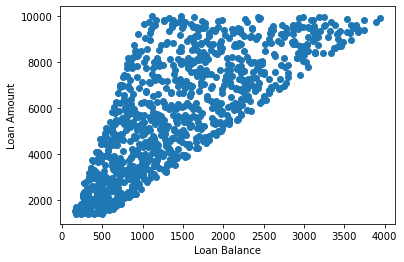

In [18]:
# Loan Amount and Loan Balance
plt.scatter(df.loan_balance,df['loan_amount'])
plt.xlabel('Loan Balance')
plt.ylabel('Loan Amount')

# 2. Use Machine Learning(k-means algorithm) for customer segmentation

In [19]:
# Use 3 clusters and see the results,later we can fine tune after finding SSE (sum of squared estimate of errors)
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['loan_balance','loan_amount']])
# y_predicted
df['cluster']=y_predicted
df.head()

,client_id,first_name,last_name,email,gender,country,state,loan_amount,loan_balance,loan_id,max_days_delinquent,age_of_loan,no_of_loans,credit_score,income,cluster
0,47149,Duke,Minchell,dminchell0@whitehouse.gov,Male,United States,California,7282.91,1468.100293,81635,6,3,3,698,24803,1
1,89269,Monroe,Rennolds,mrennolds1@acquirethisname.com,Polygender,United States,California,8758.47,3170.080830,66578,7,7,4,357,57078,1
2,88935,Jolie,Padgett,jpadgett2@cafepress.com,Polygender,United States,New York,4385.26,601.955780,75059,1,1,4,473,28887,0
3,29833,Belita,Agneau,bagneau3@upenn.edu,Non-binary,United States,Florida,2060.16,518.389333,66372,1,6,2,628,55930,2
4,55856,Avery,Ayllett,aayllett4@blogs.com,Female,United States,California,3063.19,906.364284,69571,6,4,5,677,25977,2


In [20]:
# Centroids
km.cluster_centers_

array([[1378.97972601, 5678.61586705],
       [2187.7873448 , 8627.61752976],
       [ 692.95852058, 2798.76481132]])

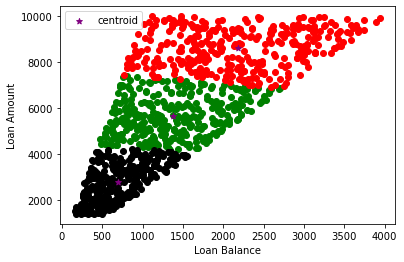

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.loan_balance,df1['loan_amount'],color='green')
plt.scatter(df2.loan_balance,df2['loan_amount'],color='red')
plt.scatter(df3.loan_balance,df3['loan_amount'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Loan Balance')
plt.ylabel('Loan Amount')
plt.legend()

In [22]:
# scale loan balance and loan amount
scaler = MinMaxScaler()
scaler.fit(df[['loan_amount']])
df['loan_amount'] = scaler.transform(df[['loan_amount']])

scaler.fit(df[['loan_balance']])
df['loan_balance'] = scaler.transform(df[['loan_balance']])

In [23]:
df.head()

,client_id,first_name,last_name,email,gender,country,state,loan_amount,loan_balance,loan_id,max_days_delinquent,age_of_loan,no_of_loans,credit_score,income,cluster
0,47149,Duke,Minchell,dminchell0@whitehouse.gov,Male,United States,California,0.684013,0.345218,81635,6,3,3,698,24803,1
1,89269,Monroe,Rennolds,mrennolds1@acquirethisname.com,Polygender,United States,California,0.856000,0.796582,66578,7,7,4,357,57078,1
2,88935,Jolie,Padgett,jpadgett2@cafepress.com,Polygender,United States,New York,0.346271,0.115517,75059,1,1,4,473,28887,0
3,29833,Belita,Agneau,bagneau3@upenn.edu,Non-binary,United States,Florida,0.075263,0.093355,66372,1,6,2,628,55930,2
4,55856,Avery,Ayllett,aayllett4@blogs.com,Female,United States,California,0.192174,0.196246,69571,6,4,5,677,25977,2


### Scatter plot the data

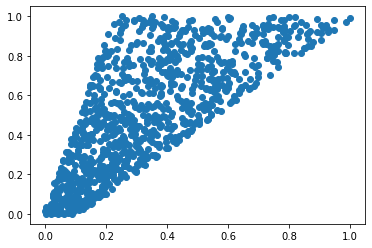

In [24]:
plt.scatter(df.loan_balance,df['loan_amount'])

### Run the model with 3 clusters

In [25]:
km = KMeans(n_clusters=3)
df['cluster']= km.fit_predict(df[['loan_balance','loan_amount']])
df.head()

,client_id,first_name,last_name,email,gender,country,state,loan_amount,loan_balance,loan_id,max_days_delinquent,age_of_loan,no_of_loans,credit_score,income,cluster
0,47149,Duke,Minchell,dminchell0@whitehouse.gov,Male,United States,California,0.684013,0.345218,81635,6,3,3,698,24803,1
1,89269,Monroe,Rennolds,mrennolds1@acquirethisname.com,Polygender,United States,California,0.856000,0.796582,66578,7,7,4,357,57078,0
2,88935,Jolie,Padgett,jpadgett2@cafepress.com,Polygender,United States,New York,0.346271,0.115517,75059,1,1,4,473,28887,2
3,29833,Belita,Agneau,bagneau3@upenn.edu,Non-binary,United States,Florida,0.075263,0.093355,66372,1,6,2,628,55930,2
4,55856,Avery,Ayllett,aayllett4@blogs.com,Female,United States,California,0.192174,0.196246,69571,6,4,5,677,25977,2


In [26]:
#Centroids
km.cluster_centers_

array([[0.57243113, 0.83281496],
       [0.30289909, 0.51037514],
       [0.12844881, 0.16077717]])

### Results with 3 Clusters  -  Loan Amount vs Loan Balance

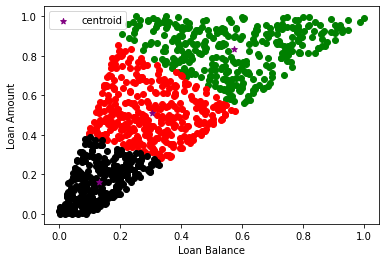

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.loan_balance,df1['loan_amount'],color='green')
plt.scatter(df2.loan_balance,df2['loan_amount'],color='red')
plt.scatter(df3.loan_balance,df3['loan_amount'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Loan Balance')
plt.ylabel('Loan Amount')
plt.legend()

In [28]:
# get the users in cluster green
df2.head()

,client_id,first_name,last_name,email,gender,country,state,loan_amount,loan_balance,loan_id,max_days_delinquent,age_of_loan,no_of_loans,credit_score,income,cluster
0,47149,Duke,Minchell,dminchell0@whitehouse.gov,Male,United States,California,0.684013,0.345218,81635,6,3,3,698,24803,1
5,40643,Kenneth,Doucette,kdoucette5@hatena.ne.jp,Male,United States,Texas,0.340839,0.238133,78117,10,9,3,416,41214,1
8,56578,Leonerd,Elner,lelner8@uiuc.edu,Bigender,United States,Florida,0.332897,0.402933,71764,6,5,1,731,25517,1
9,76671,Appolonia,Howlin,ahowlin9@ifeng.com,Polygender,United States,Florida,0.834297,0.235165,82744,9,5,4,692,24267,1
10,41301,Krissy,Kinner,kkinnera@cam.ac.uk,Agender,United States,New York,0.439399,0.375506,94459,2,4,3,793,51855,1


### Find the right cluster size from Elbow Chart

In [29]:
#Sum of Squared Errors  - measure of variation within a cluster
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['loan_balance','loan_amount']])
    sse.append(km.inertia_)

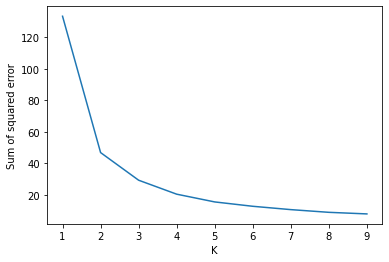

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Retrain the Model 4 clusters as required from the Elbow Chart

In [31]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['loan_balance','loan_amount']])
# y_predicted
df['cluster']=y_predicted
df.head()

,client_id,first_name,last_name,email,gender,country,state,loan_amount,loan_balance,loan_id,max_days_delinquent,age_of_loan,no_of_loans,credit_score,income,cluster
0,47149,Duke,Minchell,dminchell0@whitehouse.gov,Male,United States,California,0.684013,0.345218,81635,6,3,3,698,24803,3
1,89269,Monroe,Rennolds,mrennolds1@acquirethisname.com,Polygender,United States,California,0.856000,0.796582,66578,7,7,4,357,57078,1
2,88935,Jolie,Padgett,jpadgett2@cafepress.com,Polygender,United States,New York,0.346271,0.115517,75059,1,1,4,473,28887,2
3,29833,Belita,Agneau,bagneau3@upenn.edu,Non-binary,United States,Florida,0.075263,0.093355,66372,1,6,2,628,55930,2
4,55856,Avery,Ayllett,aayllett4@blogs.com,Female,United States,California,0.192174,0.196246,69571,6,4,5,677,25977,2


In [32]:
#Centroids
km.cluster_centers_

array([[0.29918194, 0.44913837],
       [0.7123883 , 0.84244468],
       [0.1199509 , 0.14886173],
       [0.38421798, 0.78603678]])


### Results with 4 clusters - Loan Amount vs Loan Balance
<br/>
<br/>

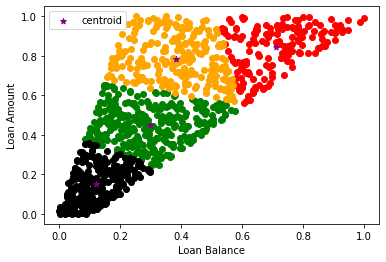

In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.loan_balance,df1['loan_amount'],color='green')
plt.scatter(df2.loan_balance,df2['loan_amount'],color='red')
plt.scatter(df3.loan_balance,df3['loan_amount'],color='black')
plt.scatter(df4.loan_balance,df4['loan_amount'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Loan Balance')
plt.ylabel('Loan Amount')
plt.legend()

# 3. Pick the right customer segment

In [34]:
# Use customer id belongs to the customer 
df4.head()  # Target customers who are having low loan balance with higher loan amount

,client_id,first_name,last_name,email,gender,country,state,loan_amount,loan_balance,loan_id,max_days_delinquent,age_of_loan,no_of_loans,credit_score,income,cluster
0,47149,Duke,Minchell,dminchell0@whitehouse.gov,Male,United States,California,0.684013,0.345218,81635,6,3,3,698,24803,3
9,76671,Appolonia,Howlin,ahowlin9@ifeng.com,Polygender,United States,Florida,0.834297,0.235165,82744,9,5,4,692,24267,3
14,26223,Lorrayne,Mityushin,lmityushine@skype.com,Male,United States,Texas,0.595093,0.566223,81146,8,2,3,518,46615,3
16,51984,Burtie,Cranmor,bcranmorg@loc.gov,Non-binary,United States,California,0.700343,0.398451,94862,9,7,4,369,51367,3
20,64010,Chelsea,Buckett,cbuckettk@abc.net.au,Male,United States,Florida,0.957727,0.261611,78008,8,8,1,375,32667,3


# 4.  Share/Run the selected segement for promotions

In [35]:
# see what is inside of specific segmentation based on business needs
print(f'Total No of Users {len(df)}')
print(f'Users in cluster df1 - {len(df1)}')
print(f'Users in cluster df2 - {len(df2)}')
print(f'Users in cluster df3 - {len(df3)}')
print(f'Users in cluster df4 - {len(df4)}')

# sers in cluster df4 - 288  ( Yellow)

Total No of Users 1000
Users in cluster df1 - 314
Users in cluster df2 - 165
Users in cluster df3 - 289
Users in cluster df4 - 232


In [36]:
# Save the results to csv 
df.to_csv('users_for_rewards.csv', index=False)

# 5. Other Cases - Train Model with 4 Clusters
 

###   Credit Score vs Loan Balance

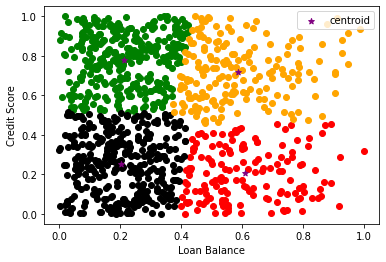

In [37]:
# Scale if required
scaler = MinMaxScaler()
scaler.fit(df[['credit_score']])
df['credit_score'] = scaler.transform(df[['credit_score']])

km = KMeans(n_clusters=4)
df['cluster']=km.fit_predict(df[['loan_balance','credit_score']])
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.loan_balance,df1['credit_score'],color='green')
plt.scatter(df2.loan_balance,df2['credit_score'],color='red')
plt.scatter(df3.loan_balance,df3['credit_score'],color='black')
plt.scatter(df4.loan_balance,df4['credit_score'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Loan Balance')
plt.ylabel('Credit Score')
plt.legend()

###  Income vs Loan Balance

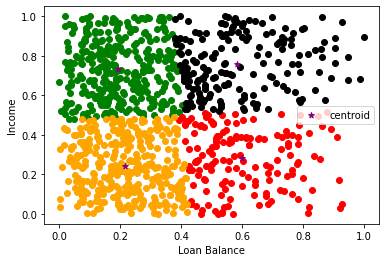

In [38]:
# Income and loan balance

# Scale if required
scaler = MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

km = KMeans(n_clusters=4)
df['cluster']=km.fit_predict(df[['loan_balance','income']])
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.loan_balance,df1['income'],color='green')
plt.scatter(df2.loan_balance,df2['income'],color='red')
plt.scatter(df3.loan_balance,df3['income'],color='black')
plt.scatter(df4.loan_balance,df4['income'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Loan Balance')
plt.ylabel('Income')
plt.legend()

<div align=center style=color:green><h1> Thank you !! </h1> </div>

<br/><br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/><br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/><br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/><br/>
<br/>
<br/>
<br/>
<br/>
<br/>